### Querying the altimetry database for uncertainty estimates in the regional extrapolation

#### A. Arendt Oct 2019

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import numpy as np

import Altimetry as alt

### Connect to the database

In [2]:
connection,cursor = alt.ConnectDb()
print "Host is %s " % alt.ConnectDb(get_host=True)
print "User is %s " % alt.ConnectDb(get_user=True)
print "DBname is %s \n" % alt.ConnectDb(get_dbname=True)

Host is localhost 
User is arendta 
DBname is sandbox 



#### Query the database to list all the regions 

In [63]:
cursor.execute("SELECT distinct(region) from ergi_mat_view;")
regions = cursor.fetchall()
regions

[(None,),
 ('Chugach Range',),
 ('Fairweather Glacier Bay',),
 ('Juneau Icefield',),
 ('Stikine Icefield',),
 ('Aluetian Range',),
 ('Coast Range BC',),
 ('Kenai Mountains',),
 ('Alaska Range',),
 ('St. Elias Mountains',),
 ('Wrangell Mountains',),
 ('Brooks Range',)]

#### Sample plots showing dz/z extrapolation curves, and their variability across regions

object
(35, 100)
object
(35, 100)
object
(21, 100)
object
(10, 100)
object
(22, 100)
object
(19, 100)
object
(6, 100)
object
(3, 100)


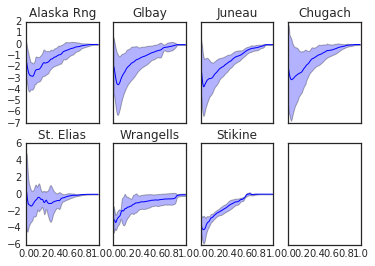

In [83]:
fig, ax = plt.subplots(2, 4, sharex='col', sharey='row')

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region={}".format("'Alaska Range'")) 
wra.normalize_elevation()
wra.calc_dz_stats()

# axes are in a two-dimensional array, indexed by [row, col]
wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='Alaska Range'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 0
j = 0 
ax[i,j].set_title('Alaska Rng')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='Fairweather Glacier Bay'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 0
j = 1 
ax[i,j].set_title('Glbay')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='Juneau Icefield'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 0
j = 2
ax[i,j].set_title('Juneau')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='Chugach Range'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 0
j = 3
ax[i,j].set_title('Chugach')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='St. Elias Mountains'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 1
j = 0
ax[i,j].set_title('St. Elias')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='Wrangell Mountains'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 1
j = 1
ax[i,j].set_title('Wrangells')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True,userwhere="ergi_mat_view.region='Stikine Icefield'") 
wra.normalize_elevation()
wra.calc_dz_stats()
i = 1
j = 2
ax[i,j].set_title('Stikine')
ax[i,j].plot(wra.norme,wra.dzs_mean)
ax[i,j].fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)

#### Without the 'where' clause, this returns the normalized dz/z curve for the entire study area

object
(130, 100)


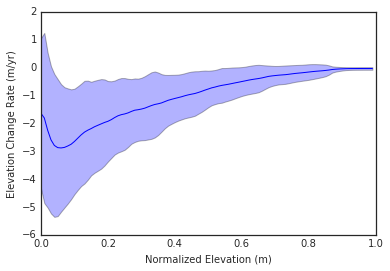

In [80]:
wra = alt.GetLambData(longest_interval=True,interval_max=30,interval_min=5,by_column=True,as_object=True) 
wra.normalize_elevation()
wra.calc_dz_stats()

#Plotting the mean surface elevation profile
plot(wra.norme,wra.dzs_mean)
#Plotting the standard deviation of surface elevation changes
fill_between(wra.norme,wra.dzs_mean+wra.dzs_std,wra.dzs_mean-wra.dzs_std,alpha=0.3)
xlabel("Normalized Elevation (m)")
ylabel("Elevation Change Rate (m/yr)")